# Table of Contents
###  01: Import Libraries and Data
### 02: PII Data Drop
### 03: Regional Segmentation
### 04: Exclusion Flag for Low-Activity Customers
### 05: Customer Profiling
### 06: Visualizations
### 07: Customer Profile Aggregations

# 01. Import Libraries and Data

In [69]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [72]:
import matplotlib.pyplot as plt

In [2]:
path = r'/Users/Katherine/Desktop/Instacart Basket Analysis'

In [3]:
#Import Orders_products_merged Data
full_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# 02. PII Data Drop

In [4]:
#eliminating first and last name columns for PII
data_private = full_data.drop(columns = ['first_name', 'last_name'])

In [5]:
data_private.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,spending_flag,median_days_since_prior_order,order_frequency,Gender,State,Age,date_joined,dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# 03. Regional Segmentation

In [6]:
#creating groups by region
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Oregon', 'Washington', 'California', 'Hawaii']

In [7]:
#creating new column
data_private.loc[data_private['State'].isin(Northeast), 'Region'] = 'Northeast'

In [8]:
data_private.loc[data_private['State'].isin(Midwest), 'Region'] = 'Midwest'

In [9]:
data_private.loc[data_private['State'].isin(South), 'Region'] = 'South'

In [10]:
data_private.loc[data_private['State'].isin(West), 'Region'] = 'West'

In [11]:
#check output
data_private['Region'].head()

0    South
1    South
2    South
3    South
4    South
Name: Region, dtype: object

In [12]:
data_private['Region'].tail()

32404854     West
32404855    South
32404856    South
32404857    South
32404858    South
Name: Region, dtype: object

In [13]:
data_private.shape

(32404859, 32)

In [14]:
data_private['Region'].value_counts(dropna = False)

Region
South        10159210
West          8292913
Midwest       7597325
Northeast     5722736
NaN            632675
Name: count, dtype: int64

In [15]:
#spending habits between regions
crosstab = pd.crosstab(data_private['Region'], data_private['spending_flag'], dropna = False)

In [16]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,199546,9959664
West,160354,8132559


# 04. Exclusion Flag for Low-Activity Customers

In [12]:
#creating customer activity column
data_private.loc[data_private['max_order']>=5,'customer_activity']= 'high_activity_customer'

In [18]:
data_private.loc[data_private['max_order'] <5,'customer_activity']= 'low_activity_customer'

In [ ]:
#create a subset for low_activity_customers
low_activity_customers = data_private[data_private['customer_activity'] == 'low_activity_customer']

In [ ]:
#checking max order of subset
low_activity_customers['max_order'].max()

In [ ]:
#export
low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [13]:
#creating high_activity_customers df
high_activity_customers = data_private[data_private['customer_activity'] == 'high_activity_customer']

In [20]:
#checking min order of df
high_activity_customers['max_order'].min()

5

In [14]:
#export
high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

# 05. Customer Profiling

In [6]:
#Import orders_products_all Data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Katherine/Desktop/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_all.pkl'

In [5]:
#profiling age
df['Age'].min()

18

In [6]:
df['Age'].max()

81

In [5]:
#creating age_group column
df.loc[df['Age'] <=35, 'age_group'] = 'Young Adult'

In [6]:
df.loc[(df['Age'] >35) & (df['Age'] <60), 'age_group'] = 'Middle Age'

In [7]:
df.loc[df['Age'] >=60, 'age_group'] = 'Senior'

In [10]:
#test
df['age_group'].value_counts(dropna=False)

age_group
Middle Age     11651255
Senior         10574504
Young Adult     8738805
Name: count, dtype: int64

In [ ]:
#profiling income
df['income'].describe()

In [12]:
df['income'].max()

593901

In [13]:
df['income'].min()

25903

In [14]:
df['income'].mean()

99675.86510754681

In [8]:
#creating income_status column
df.loc[df['income'] <= 99675, 'income_status'] = 'below_average'

In [9]:
df.loc[df['income'] > 99675, 'income_status'] = 'above_average'

In [17]:
#test
df['income_status'].value_counts(dropna=False)

income_status
below_average    16623993
above_average    14340571
Name: count, dtype: int64

In [18]:
#import departments_wrangled data
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [19]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
#rename column
departments = departments.rename(columns={'Unnamed: 0' : 'department_id'})

In [21]:
#merge customer and departments data
df_merged = df.merge(departments, on='department_id')

In [22]:
#export
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

In [3]:
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [25]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,Age,date_joined,dependents,marital_status,income,Region,customer_activity,age_group,income_status,department
0,2539329,1,1,2,8,NaN,196,1,0,both,...,31,2/17/2019,3,married,40423,South,high_activity_customer,Young Adult,below_average,beverages
1,2398795,1,2,3,7,15.0,196,1,1,both,...,31,2/17/2019,3,married,40423,South,high_activity_customer,Young Adult,below_average,beverages
2,473747,1,3,3,12,21.0,196,1,1,both,...,31,2/17/2019,3,married,40423,South,high_activity_customer,Young Adult,below_average,beverages
3,2254736,1,4,4,7,29.0,196,1,1,both,...,31,2/17/2019,3,married,40423,South,high_activity_customer,Young Adult,below_average,beverages
4,431534,1,5,4,15,28.0,196,1,1,both,...,31,2/17/2019,3,married,40423,South,high_activity_customer,Young Adult,below_average,beverages


In [4]:
#creating dependents_status column
df_merged.loc[df_merged['dependents'] == 0, 'dependents_status'] = 'No Dependents'

In [5]:
df_merged.loc[df_merged['dependents'] > 0, 'dependents_status'] = 'Dependents'

In [6]:
#test
df_merged['dependents_status'].value_counts(dropna=False)

dependents_status
Dependents       23224883
No Dependents     7739681
Name: count, dtype: int64

In [7]:
#profiling young adult, middle age, and senior parents
df_merged.loc[(df_merged['age_group'] == 'Young Adult') & (df_merged['dependents_status'] == 'Dependents'), 'parent_profile'] = 'Younger Parent'

In [8]:
df_merged.loc[(df_merged['age_group'] == 'Middle Age') & (df_merged['dependents_status'] == 'Dependents'), 'parent_profile'] = 'Middle Age Parent'

In [9]:
df_merged.loc[(df_merged['age_group'] == 'Senior') & (df_merged['dependents_status'] == 'Dependants'), 'parent_profile'] = 'Senior Parent'

In [10]:
#profiling for young adult, middle age, and senior non-parents
df_merged.loc[(df_merged['age_group'] == 'Young Adult') & (df_merged['dependents_status'] == 'No Dependents'), 'parent_profile'] = 'Childless Young Adult'

In [11]:
df_merged.loc[(df_merged['age_group'] == 'Middle Age') & (df_merged['dependents_status'] == 'No Dependents'), 'parent_profile'] = 'Childless Middle Age'

In [12]:
df_merged.loc[(df_merged['age_group'] == 'Senior') & (df_merged['dependents_status'] == 'No Dependents'), 'parent_profile'] = 'Childless Senior'

In [14]:
#check
df_merged['parent_profile'].value_counts(dropna=False)

parent_profile
Middle Age Parent        8734535
NaN                      7929233
Younger Parent           6561115
Childless Middle Age     2916720
Childless Senior         2645271
Childless Young Adult    2177690
Name: count, dtype: int64

In [13]:
#checking age_profile with spending_flag
Age_spending = pd.crosstab(df_merged['spending_flag'], df_merged['age_group'], dropna = False)

In [14]:
#checking age_profile with region
age_region = pd.crosstab(df_merged['Region'], df_merged['age_group'], dropna = False)

In [15]:
#checking spending habit by region
spending_habit_region = pd.crosstab(df_merged['Region'], df_merged['spending_flag'], dropna = False)

In [16]:
#order habits and loyalty status
loyalty_order = pd.crosstab(df_merged['department'], df_merged['loyalty_flag'], dropna = False)

In [17]:
#order habits and region
region_order = pd.crosstab(df_merged['department'], df_merged['Region'], dropna = False)

In [18]:
#spending habit by region
spending_habit_region = pd.crosstab(df_merged['spending_flag'], df_merged['Region'], dropna = False)

In [19]:
#checking department by age_group
department_age_group = pd.crosstab(df_merged['department'], df_merged['age_group'], dropna = False)

In [20]:
#checking department by parent_profile
department_parent_profile = pd.crosstab(df_merged['department'], df_merged['parent_profile'], dropna = False)

In [21]:
#checking department by parent_profile
department_marital_status = pd.crosstab(df_merged['department'], df_merged['marital_status'], dropna = False)

In [22]:
#checking department by income
department_income = pd.crosstab(df_merged['department'], df_merged['income_status'], dropna = False)

In [23]:
#checking loyalty and parent_profile
loyalty_parent_profile = pd.crosstab(df_merged['loyalty_flag'], df_merged['parent_profile'], dropna = False)

# 06. Visualizations

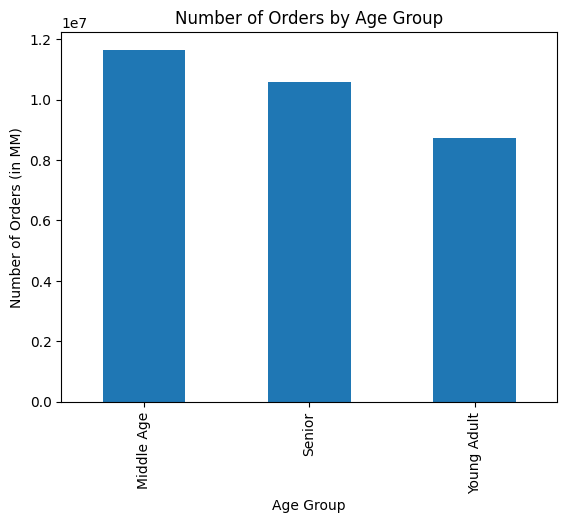

In [73]:
#age group bar graph
age_group_bar = df_merged['age_group'].value_counts().sort_index().plot.bar(title = 'Number of Orders by Age Group', xlabel = 'Age Group', ylabel = 'Number of Orders (in MM)')

In [34]:
#save as an image
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_bar.png'))

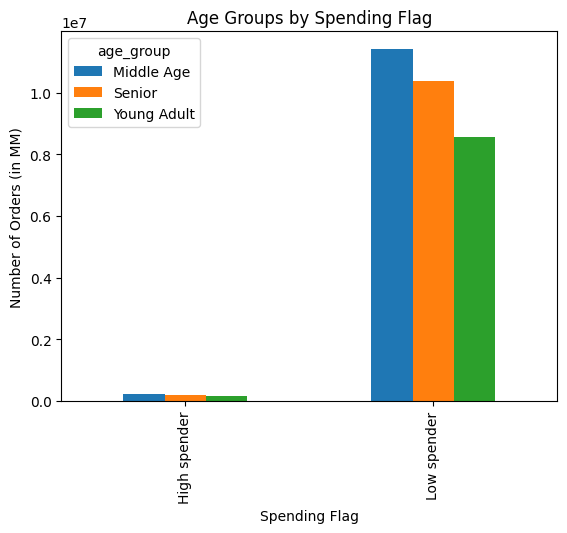

In [62]:
#age_spending bar chart
age_spending_bar = Age_spending.sort_index().plot.bar(xlabel = 'Spending Flag', ylabel = 'Number of Orders (in MM)'),
plt.title('Age Groups by Spending Flag'),
plt.show()

In [61]:
#save as an image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spending_bar.png'))

<Figure size 640x480 with 0 Axes>

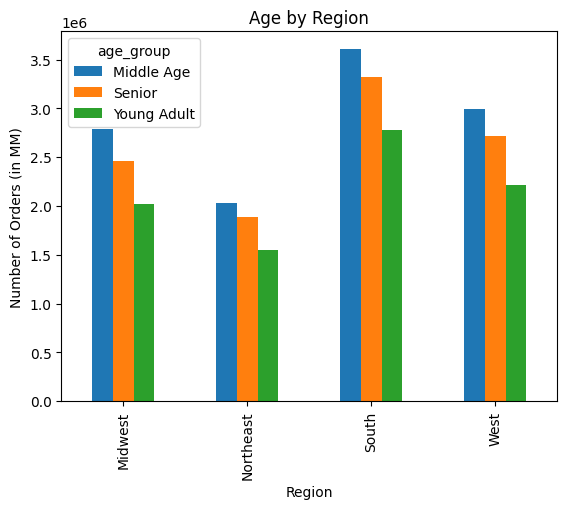

In [63]:
#bar chart of age and region
age_region_bar = age_region.sort_index().plot.bar(xlabel = 'Region', ylabel = 'Number of Orders (in MM)'),
plt.title('Age by Region'),
plt.show()

In [65]:
#save as an image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))

<Figure size 640x480 with 0 Axes>

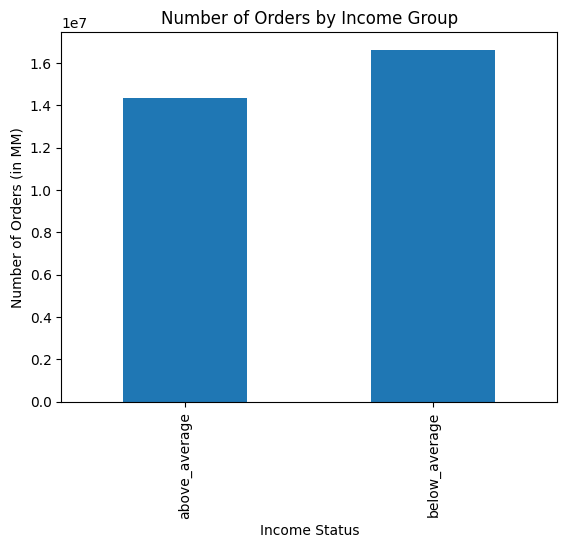

In [64]:
#bar chart of number of orders based on income group
income_status_bar = df_merged['income_status'].value_counts().sort_index().plot.bar(title = 'Number of Orders by Income Group', xlabel = 'Income Status', ylabel = 'Number of Orders (in MM)')

In [37]:
#save as an image
income_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_status_bar.png'))

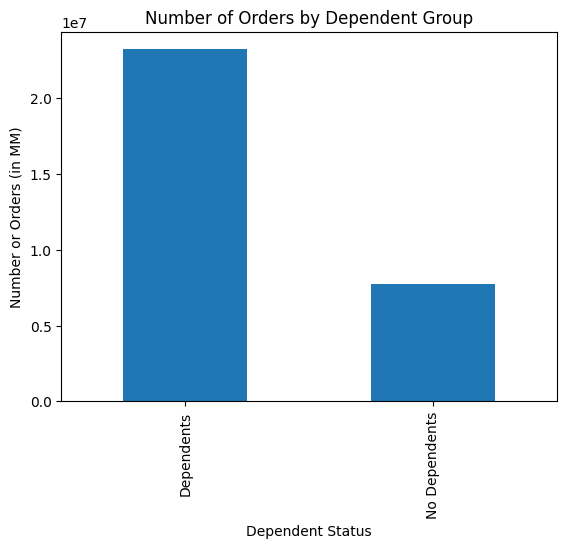

In [65]:
#bar of dependents status
dependents_status_bar = df_merged['dependents_status'].value_counts().sort_index().plot.bar(title = 'Number of Orders by Dependent Group', xlabel = 'Dependent Status', ylabel = 'Number or Orders (in MM)')

In [70]:
#save as an image
dependents_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_status_bar.png'))

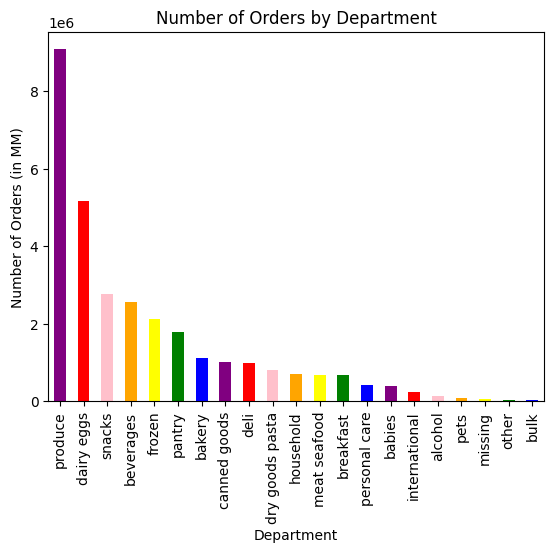

In [23]:
#Number of Orders by Department bar graph
departments_bar = df_merged['department'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'], title = 'Number of Orders by Department', xlabel = 'Department', ylabel = 'Number of Orders (in MM)'),

In [74]:
#save as an image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_bar.png'))

<Figure size 640x480 with 0 Axes>

In [29]:
spending_habit_region.head()

Region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,148678,103120,189659,152288
Low spender,7112835,5361565,9518171,7774939


In [30]:
#spending_habit_region bar 
spending_habit_region_bar = spending_habit_region.sort_values(ascending=False).plot.bar(xlabel = 'Spending Flag', ylabel = 'Number of Orders (in MM)'),
plt.title('Spending Habits by Region')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1325738508.py, line 2)

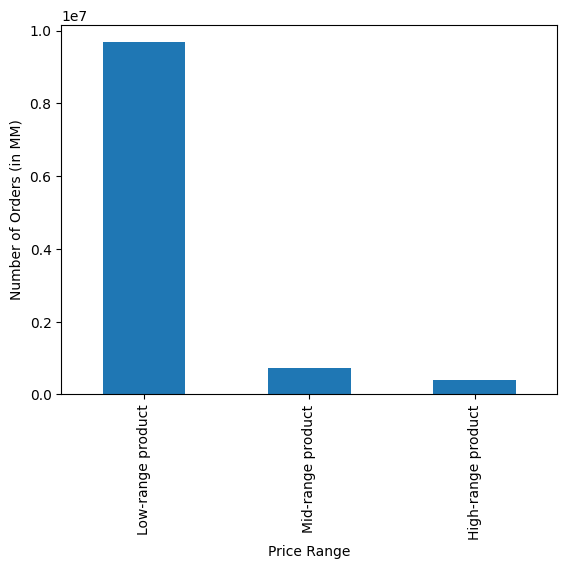

In [70]:
#creating a bar chart of price_label
price_range_bar = df_merged['price_range_loc'].value_counts().plot.bar(xlabel = 'Price Range', ylabel = 'Number of Orders (in MM)')

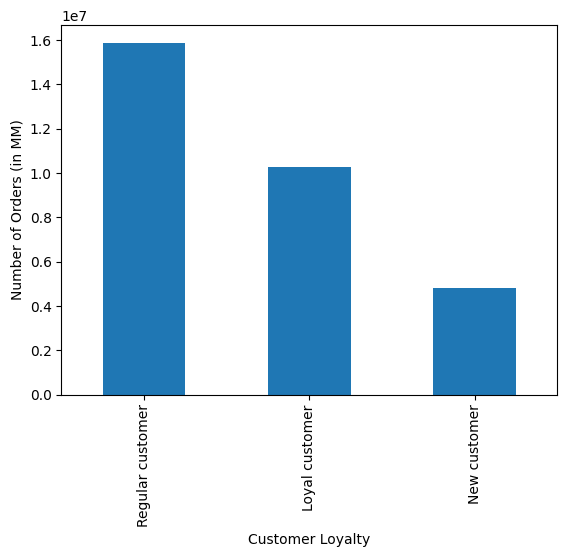

In [71]:
#Create a bar chart from the “loyalty_flag” column
loyalty_bar = df_merged['loyalty_flag'].value_counts().plot.bar(xlabel = 'Customer Loyalty', ylabel = 'Number of Orders (in MM)')

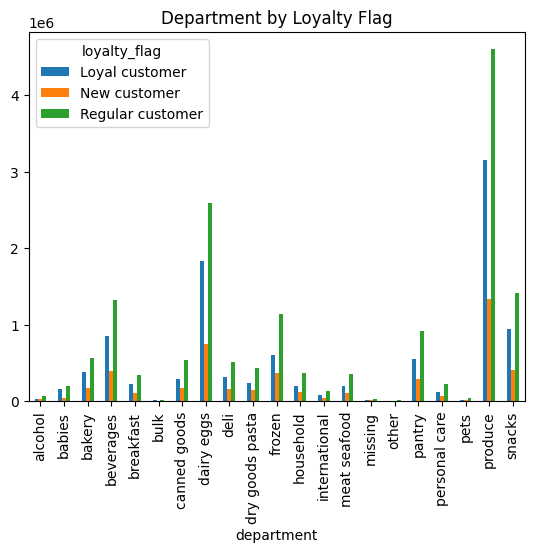

In [60]:
#age_spending bar chart
loyalty_order_bar = loyalty_order.plot.bar(),
plt.title('Department by Loyalty Flag'),
plt.show()

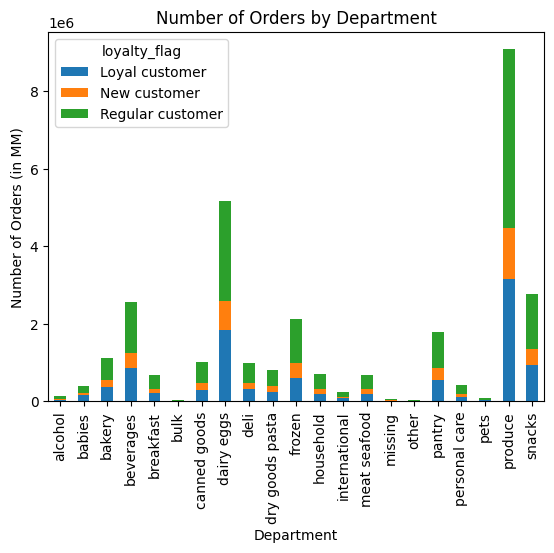

In [58]:
#Age and Spending bar
departments_bar = loyalty_order.plot.bar(stacked = True, title = 'Number of Orders by Department', xlabel = 'Department', ylabel = 'Number of Orders (in MM)')

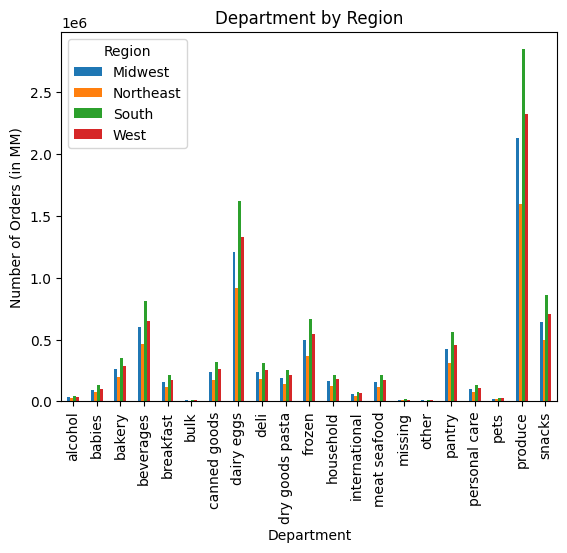

In [64]:
#bar chart of department and region
region_order_bar = region_order.plot.bar(xlabel = 'Department', ylabel = 'Number of Orders (in MM)'),
plt.title('Department by Region'),
plt.show()

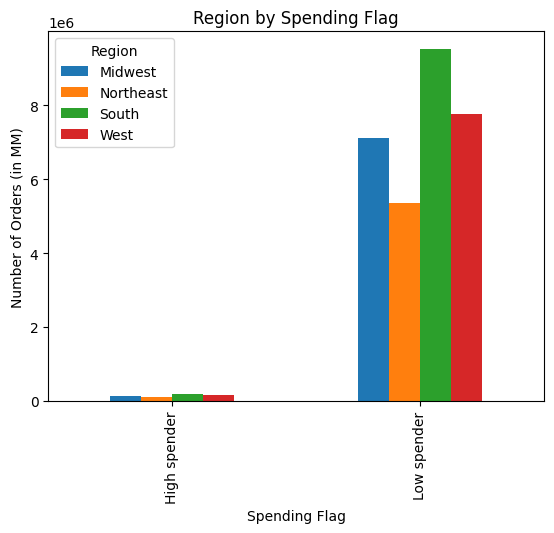

In [49]:
#spending_region bar chart
spending_region = spending_habit_region.plot.bar(xlabel = 'Spending Flag', ylabel = 'Number of Orders (in MM)'),
plt.title('Region by Spending Flag'),
plt.show()

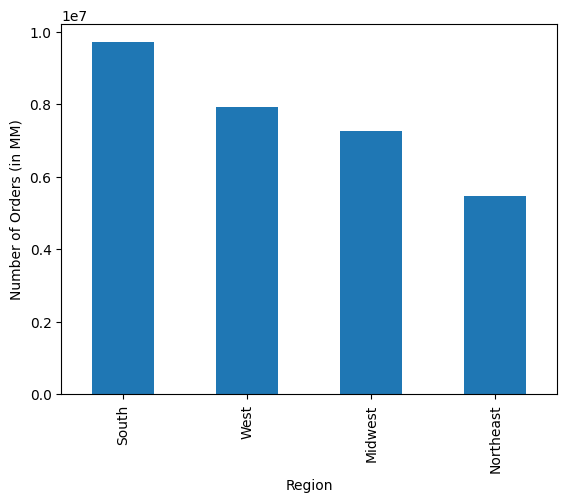

In [88]:
#bar chart of Region
region_bar = df_merged['Region'].value_counts().plot.bar(xlabel = 'Region', ylabel = 'Number of Orders (in MM)')

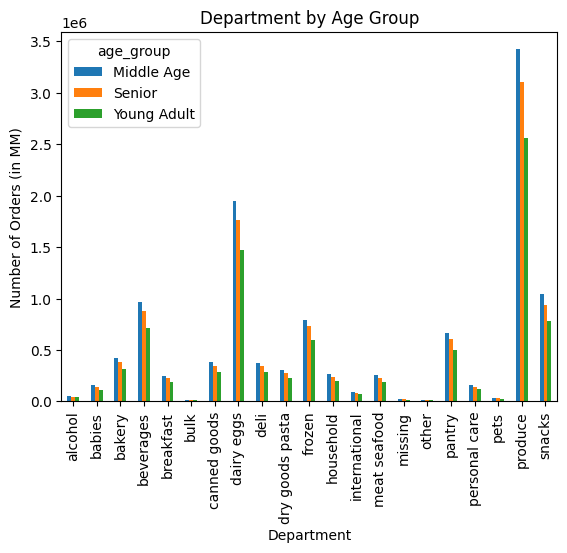

In [89]:
#spending_region bar chart
department_age_group = department_age_group.plot.bar(xlabel = 'Department', ylabel = 'Number of Orders (in MM)'),
plt.title('Department by Age Group'),
plt.show()

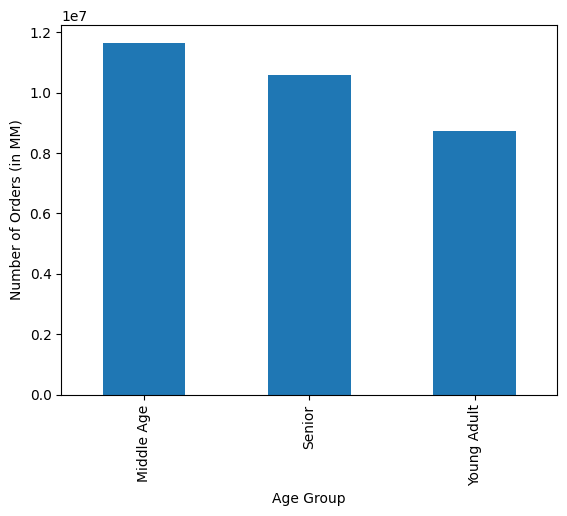

In [90]:
#bar chart from age group
frequency_age_group = df_merged['age_group'].value_counts().plot.bar(xlabel = 'Age Group', ylabel = 'Number of Orders (in MM)')

In [76]:
#department and parent_profile bar chart
department_parent_profile = department_parent_profile.plot.bar(xlabel = 'Department', ylabel = 'Number of Orders (in MM)'),
plt.title('Department by Parent Profile'),
plt.show()

AttributeError: 'tuple' object has no attribute 'plot'

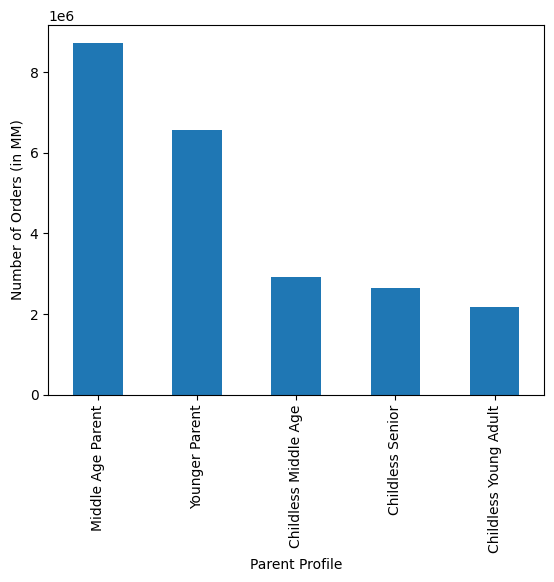

In [92]:
#bar chart from parent_profile
frequency_parent_profile = df_merged['parent_profile'].value_counts().plot.bar(xlabel = 'Parent Profile', ylabel = 'Number of Orders (in MM)')

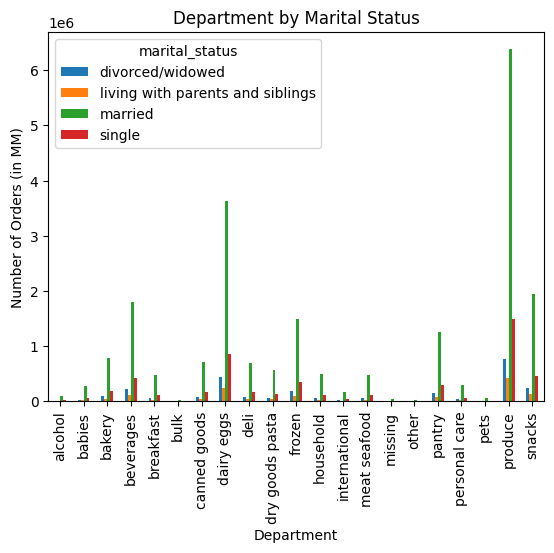

In [93]:
#department and marital_status bar chart
department_marital_status = department_marital_status.plot.bar(xlabel = 'Department', ylabel = 'Number of Orders (in MM)'),
plt.title('Department by Marital Status'),
plt.show()

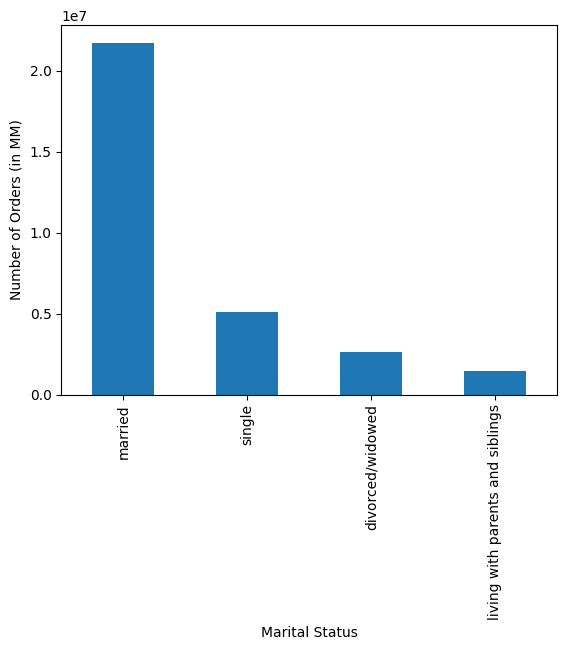

In [95]:
#bar chart from parent_profile
frequency_marital_status = df_merged['marital_status'].value_counts().plot.bar(xlabel = 'Marital Status', ylabel = 'Number of Orders (in MM)')

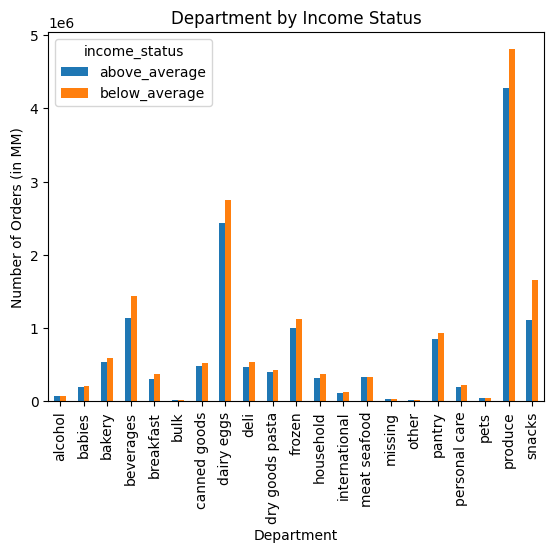

In [97]:
#bar chart of department and income
department_income = department_income.plot.bar(xlabel = 'Department', ylabel = 'Number of Orders (in MM)'),
plt.title('Department by Income Status'),
plt.show()

<Axes: title={'center': 'Orders by Day of the Week'}, xlabel='Day of the Week', ylabel='Number of Orders (in MM)'>

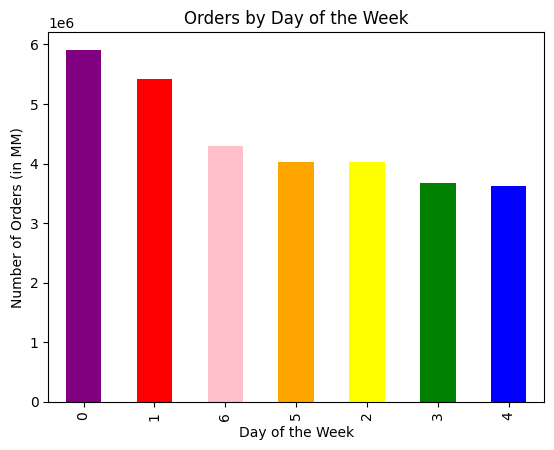

In [100]:
#creating a bar chart or order_day_of_week
df_merged['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'], title = 'Orders by Day of the Week', xlabel = 'Day of the Week', ylabel = 'Number of Orders (in MM)')

In [105]:
#to turn outliers into NaNs
df_merged.loc[df_merged['prices'] >100, 'prices'] = np.nan

<Axes: title={'center': 'Orders by Prices'}, xlabel='Price', ylabel='Number of Orders (in MM)'>

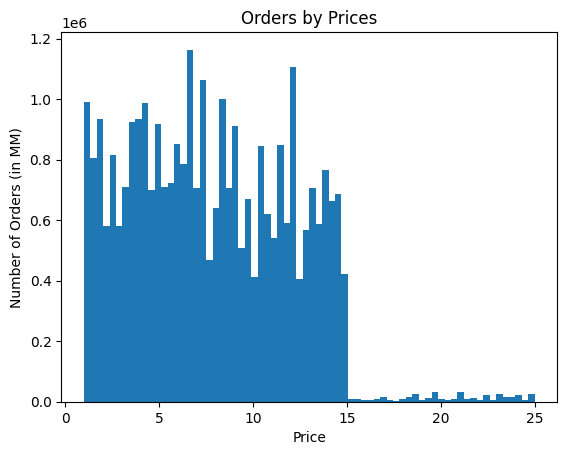

In [108]:
#creating histogram for 'prices'
df_merged['prices'].plot.hist(bins = 70, title = 'Orders by Prices', xlabel = 'Price', ylabel = 'Number of Orders (in MM)')

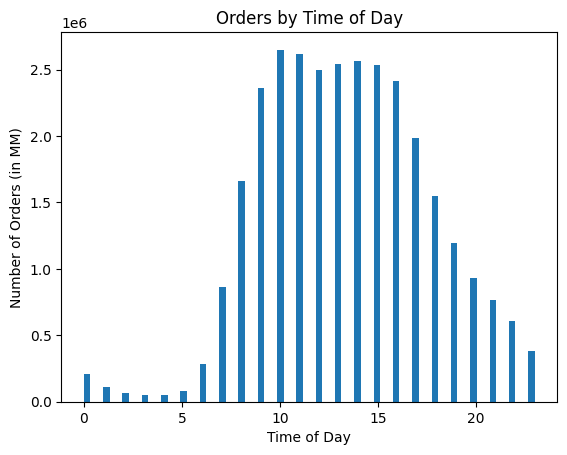

In [110]:
#Create a histogram of the “order_time” column
order_time_hist = df_merged['order_time'].plot.hist(bins = 70, title = 'Orders by Time of Day', xlabel = 'Time of Day', ylabel = 'Number of Orders (in MM)')

# 07. Customer Profile Aggregations

In [76]:
#marital_status and dependents
df_merged.groupby('marital_status').agg({'dependents': ['min', 'max', 'mean']})

dependents              
                                        min max      mean
marital_status                                           
divorced/widowed                          0   0  0.000000
living with parents and siblings          1   3  1.986783
married                                   1   3  2.003357
single                                    0   0  0.000000

In [77]:
#parent_profile and price
df_merged.groupby('parent_profile').agg({'prices': ['min', 'max', 'mean']})

prices                    
                         min      max       mean
parent_profile                                  
Childless Middle Age     1.0  99999.0  12.505260
Childless Senior         1.0  99999.0  11.532741
Childless Young Adult    1.0  99999.0  12.255711
Middle Age Parent        1.0  99999.0  11.844850
Younger Parent           1.0  99999.0  12.027423

In [78]:
#parent_profile and days_since_prior_order
df_merged.groupby('parent_profile').agg({'days_since_prior_order': ['min', 'max', 'mean']})

days_since_prior_order                 
                                         min   max       mean
parent_profile                                               
Childless Middle Age                     0.0  30.0  10.750359
Childless Senior                         0.0  30.0  10.750328
Childless Young Adult                    0.0  30.0  10.898283
Middle Age Parent                        0.0  30.0  10.823263
Younger Parent                           0.0  30.0  10.806029

In [79]:
# checking spending habits by region
spend_habits_region = pd.crosstab(df_merged['department'], df_merged['Region'], dropna = False)

In [80]:
spend_habits_region

Region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,46134,36754
babies,95741,72712,132389,102428
bakery,261753,199300,350721,288155
beverages,598979,462929,810568,650574
breakfast,156155,117904,211358,173619
bulk,7929,5599,10526,8743
canned goods,237459,176936,318042,260221
dairy eggs,1212490,914616,1622617,1327060
deli,234464,178398,313406,257352


In [81]:
#checking spending habits by age
spending_habits_age = df_merged.groupby('age_group').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

In [82]:
spending_habits_age

days_since_prior_order                   prices                
                               max       mean  min      max       mean  min
age_group                                                                  
Middle Age                    30.0  10.805012  0.0  99999.0  12.010174  1.0
Senior                        30.0  10.800665  0.0  99999.0  11.724449  1.0
Young Adult                   30.0  10.829007  0.0  99999.0  12.084312  1.0

In [83]:
df_merged.shape

(30964564, 38)